In [1]:
import numpy as np
import pandas as pd 
import scipy as sp
import scipy.io
from scipy.stats import norm
from scipy.stats import multivariate_normal
from scipy.signal import find_peaks

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

import os
import glob
import fnmatch
import re

from ArapucaRoutineMainFunctions import *

In [2]:
#base_path = '/Users/bordoni/protoDUNE/XeDoping/Arapuca/mod304'
base_path = '/Users/bordoni/protoDUNE/XeDoping/testfiles'

file_path = os.path.join(base_path,'*.dat')
#file_name_list = [ os.path.basename(f) for f in glob.glob(file_path) ]
file_name_list =  glob.glob(file_path) 


#file_path

file_name_list

['/Users/bordoni/protoDUNE/XeDoping/testfiles/run11107_evt12002_mod603_ch6.dat',
 '/Users/bordoni/protoDUNE/XeDoping/testfiles/run11107_evt12002_mod603_ch7.dat',
 '/Users/bordoni/protoDUNE/XeDoping/testfiles/run11099_evt4005_mod603_ch9.dat',
 '/Users/bordoni/protoDUNE/XeDoping/testfiles/run11107_evt12002_mod603_ch5.dat',
 '/Users/bordoni/protoDUNE/XeDoping/testfiles/run11107_evt12002_mod603_ch11.dat',
 '/Users/bordoni/protoDUNE/XeDoping/testfiles/run11107_evt12002_mod603_ch10.dat',
 '/Users/bordoni/protoDUNE/XeDoping/testfiles/run11107_evt12002_mod603_ch4.dat',
 '/Users/bordoni/protoDUNE/XeDoping/testfiles/run11099_evt4005_mod603_ch8.dat',
 '/Users/bordoni/protoDUNE/XeDoping/testfiles/run11107_evt12002_mod603_ch0.dat',
 '/Users/bordoni/protoDUNE/XeDoping/testfiles/run11107_evt12002_mod603_ch1.dat',
 '/Users/bordoni/protoDUNE/XeDoping/testfiles/run11107_evt12002_mod603_ch3.dat',
 '/Users/bordoni/protoDUNE/XeDoping/testfiles/run11107_evt12002_mod603_ch2.dat',
 '/Users/bordoni/protoDUNE/X

In [3]:
import re


def parse_file_name(file_name):
    p = re.compile(os.path.join(base_path,     
    'run(?P<run_number>\d+)_evt(?P<run_part>\d+)_mod(?P<module>\d+)_ch(?P<channel>\d+).dat') )

    m = p.match(file_name)
    d = m.groupdict()
    d['file_name'] = file_name
    return d

In [4]:
file_name_dict = [parse_file_name(f) for f in file_name_list]

In [5]:
def file_for_run_and_channel(dictt=file_name_dict, run=1234567, ch=4):
    return [ f['file_name'] for f in dictt if f['run_number'] == str(run) and f['channel'] == str(ch)]

def file_for_channel(dictt=file_name_dict, ch=4):
    return [ f['file_name'] for f in dictt if f['channel'] == str(ch)]

In [6]:
file_for_run_and_channel(file_name_dict, run=11102, ch=0)

['/Users/bordoni/protoDUNE/XeDoping/testfiles/run11102_evt132112_mod603_ch0.dat']

In [7]:
mytest = file_for_channel(file_name_dict, ch=10)
mytest

['/Users/bordoni/protoDUNE/XeDoping/testfiles/run11107_evt12002_mod603_ch10.dat',
 '/Users/bordoni/protoDUNE/XeDoping/testfiles/run11099_evt4005_mod603_ch10.dat',
 '/Users/bordoni/protoDUNE/XeDoping/testfiles/run11102_evt132112_mod603_ch10.dat']

In [8]:
def readfile_list(filename_list):       
    
    def read_single_file(f):
        #load the file as a np array
        data = np.loadtxt(f)
        #data = pd.read_fwf(f, header=None)
        nevts = int(len(data)/2024)
        #reshape the array as 10000 events and 2024 columns each
        data = data.reshape(nevts, 2024)
        #create a dataframe from the numpy array
        return pd.DataFrame(data, columns=range(0,2024))
    
    data_list = [read_single_file(f) for f in filename_list]
    return pd.concat(data_list, axis=0)

In [9]:
def create_dataset_list(file_name_dict):
    
    df_list = []
    
    for i in range (0,12):
        print('loading files for channel ', i)
        tmp_filelist = file_for_channel(file_name_dict, ch=i)
        
        df_tmp = readfile_list(tmp_filelist)
        #print(type(df_tmp))
        
        df_list.append(df_tmp)
        
    return df_list


In [10]:
df_list = create_dataset_list(file_name_dict)

loading files for channel  0
loading files for channel  1
loading files for channel  2
loading files for channel  3
loading files for channel  4
loading files for channel  5
loading files for channel  6
loading files for channel  7
loading files for channel  8
loading files for channel  9
loading files for channel  10
loading files for channel  11


In [11]:
for df in df_list:
    tmp = df[rowin].max(axis=1)
    print('max ' ,  tmp.max(), ' event with max ',  tmp.idxmax()  )

max  15041.0  event with max  767
max  16383.0  event with max  52
max  16383.0  event with max  766
max  16383.0  event with max  766
max  16383.0  event with max  767
max  11140.0  event with max  767
max  14860.0  event with max  767
max  16383.0  event with max  52
max  16383.0  event with max  878
max  16383.0  event with max  278
max  16383.0  event with max  728
max  16383.0  event with max  276


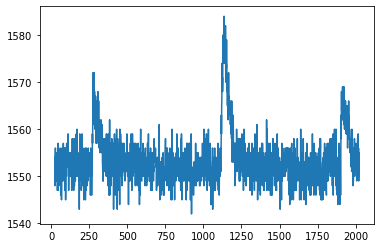

In [12]:
df_list[11].iloc[75,rowin].plot()

In [13]:
tmp = df_list[0].head()
#df_list[0][2]
#tmp['test'] = df_list[0][2]

tmp.insert(1, 'evt number', df_list[0][2].astype(int) ) 
tmp.head()


ValueError: cannot reindex from a duplicate axis

In [14]:
ped   = list(range(100, 200))   # to estimate the pedestal
rowin = list(range(24, 2024))   # all readout window
wf    = list(range(250, 2000))  # waveform 
tail  = list(range(1700, 2000)) # to estimate the single p.e.
pe    = list(range(200, 800))

In [15]:
df_list_proc = doPreProcessing(df_list)

preparing dataframe for channel :  1
preparing dataframe for channel :  2
preparing dataframe for channel :  3
preparing dataframe for channel :  4
preparing dataframe for channel :  5
preparing dataframe for channel :  6
preparing dataframe for channel :  7
preparing dataframe for channel :  8
preparing dataframe for channel :  9
preparing dataframe for channel :  10
preparing dataframe for channel :  11
preparing dataframe for channel :  12
done!
preprocessing done!


In [28]:
def find_pe_2(df, iwf):
    
    #pe_range    = list(range(100, 750)) + list(range(1500, 2000))
    pe_range    = list(range(100, 1000)) 
    #rowin = list(range(200, 800))
    #rowin = list(range(200,1500))
    x = df.iloc[iwf][pe_range]
    
    df.iloc[iwf][rowin].plot()
    #peaks, properties = find_peaks(x, prominence=[5,20], width=20)
    #properties["prominences"], properties["widths"]
    peaks, properties = find_peaks(x, height=[5,20], prominence=[5,15], width=20, distance = 30)
    properties["peak_heights"], properties["widths"]
    
    print(properties["peak_heights"])
    print(properties["widths"])
    
    print(x[peaks])
    
    #print(df.iloc[iwf][rowin].max(axis=1))
    
    #max_y = (properties["peak_heights"].max()+10 ) if (len(peaks)>0) else 200 
    #max_y = df.iloc[iwf][rowin].max() + 20
    
    peaks = peaks+min(pe_range)
    #peaks
    plt.plot(peaks, x[peaks], "x")
  
    plt.vlines(x=peaks, ymin=x[peaks] - properties["peak_heights"],
               ymax = x[peaks], color = "C1")
    plt.hlines(y=properties["width_heights"], xmin=properties["left_ips"]+min(pe_range),
               xmax=properties["right_ips"]+min(pe_range), color = "C1")
    plt.xlabel('time ticks')
    plt.ylabel('ADC counts')
    
    
    plt.show()
    
    
    return peaks, properties

In [19]:
df_list[0].tail(5)

,0,1,2,3,4,5,6,7,8,9,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
995,11102.0,1.0,132084.0,603.0,48.0,0.0,264.0,0.0,0.0,0.0,...,1583.0,1587.0,1579.0,1577.0,1575.0,1579.0,1581.0,1576.0,1573.0,1576.0
996,11102.0,1.0,132086.0,603.0,48.0,0.0,264.0,0.0,0.0,0.0,...,1578.0,1581.0,1577.0,1577.0,1583.0,1575.0,1574.0,1576.0,1580.0,1571.0
997,11102.0,1.0,132088.0,603.0,48.0,0.0,264.0,0.0,0.0,0.0,...,1578.0,1579.0,1578.0,1576.0,1575.0,1578.0,1579.0,1579.0,1577.0,1578.0
998,11102.0,1.0,132110.0,603.0,48.0,0.0,264.0,0.0,0.0,0.0,...,1579.0,1574.0,1576.0,1572.0,1576.0,1584.0,1577.0,1582.0,1577.0,1576.0
999,11102.0,1.0,132112.0,603.0,48.0,0.0,264.0,0.0,0.0,0.0,...,1577.0,1576.0,1574.0,1579.0,1584.0,1573.0,1575.0,1576.0,1580.0,1579.0


In [16]:
df_list_proc[0].tail(5)

,Ch,Run number,Evt number,0,1,2,3,4,5,6,...,2021,2022,2023,Saturated,Pedestal,hasSignal,n pe,pe height,pe width,pe area
995,0,11099,3997,11099.0,1.0,3997.0,603.0,48.0,0.0,264.0,...,-1.236667,-1.070000,-1.103333,False,1578.27,False,0.0,0.000000,0.000000,0.00
996,0,11099,3999,11099.0,1.0,3999.0,603.0,48.0,0.0,264.0,...,-1.306667,-1.373333,-1.506667,False,1577.94,True,0.0,0.000000,0.000000,0.00
997,0,11099,4001,11099.0,1.0,4001.0,603.0,48.0,0.0,264.0,...,1.383333,1.450000,1.416667,False,1577.55,False,0.0,0.000000,0.000000,0.00
998,0,11099,4003,11099.0,1.0,4003.0,603.0,48.0,0.0,264.0,...,-1.010000,-1.210000,-1.276667,False,1577.71,True,1.0,9.723333,56.819444,390.53
999,0,11099,4005,11099.0,1.0,4005.0,603.0,48.0,0.0,264.0,...,-0.380000,-0.446667,-0.480000,False,1576.98,False,0.0,0.000000,0.000000,0.00


[13.00666667 13.90666667]
[45.68181818 47.97142857]
596       0.14
693    13.0067
Name: 66, dtype: object


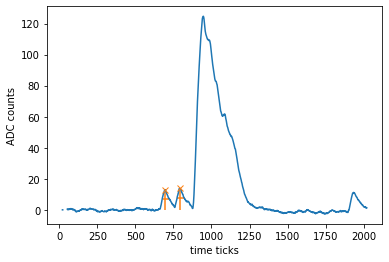

In [61]:
peaks, properties = find_pe_2(df_list_proc[11], 66)

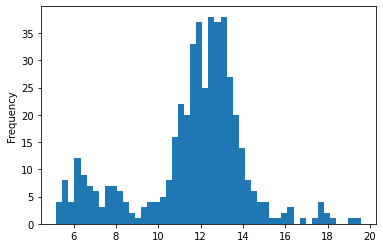

In [26]:
df_list_proc[11].loc[(df_list_proc[11]['n pe'] >0)]['pe height'].plot(kind='hist', bins=50)

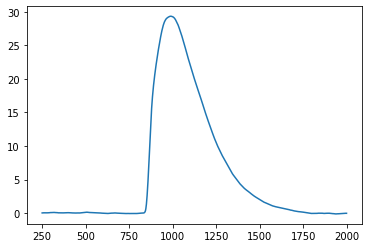

In [62]:
df_list_proc[0][wf].loc[ (df_list_proc[0]['Saturated'] == False ) ].mean().plot()

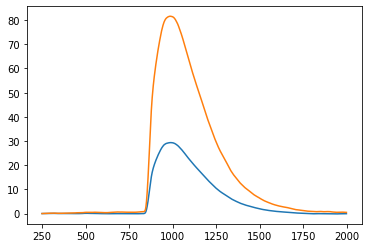

In [64]:
df_list_proc[0][wf].loc[ (df_list_proc[0]['Saturated'] == False ) ].mean().plot()
df_list_proc[0][wf].loc[ (df_list_proc[0]['Saturated'] == False ) & (df_list_proc[0]['hasSignal'] == True )].mean().plot()


In [65]:
def draw_av_wf(dflist):

    for df in dflist:
        df[wf].loc[ (df['Saturated'] == False ) & (df['hasSignal'] == True )].mean().plot()

    plt.show()
    return

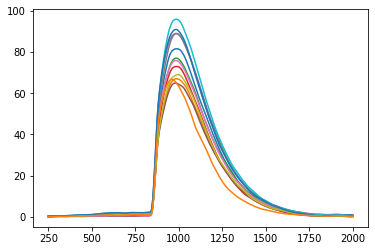

In [66]:
draw_av_wf(df_list_proc)

In [54]:
tmp = df_list_proc[0][wf].loc[ (df_list_proc[0]['Saturated'] == False ) & (df_list_proc[0]['hasSignal'] == True )].mean()


250     0.199490
251     0.195569
252     0.194392
253     0.196614
254     0.198444
          ...   
1995   -0.647307
1996   -0.629791
1997   -0.610314
1998   -0.587046
1999   -0.579987
Length: 1750, dtype: float64

In [73]:
df_av_wf= df_list_proc[0].loc[ (df_list_proc[0]['Saturated'] == False ) & (df_list_proc[0]['hasSignal'] == True )].groupby(['Run number', 'Ch'])[wf].mean()

In [74]:
df_av_wf

,,250,251,252,253,254,255,256,257,258,259,...,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999
Run number,Ch,,,,,,,,,,,,,,,,,,,,,
11099,0,0.197912,0.205788,0.206703,0.216044,0.238480,0.269341,0.282985,0.296722,0.323553,0.318608,...,0.833535,0.837289,0.826484,0.815311,0.805421,0.780604,0.755055,0.733352,0.738388,0.714945
11102,0,-0.136978,-0.144760,-0.149818,-0.152412,-0.158898,-0.171349,-0.162270,-0.164994,-0.165253,-0.155914,...,0.118664,0.118275,0.106213,0.102711,0.111012,0.123852,0.138379,0.151089,0.167302,0.164189
11107,0,-0.054102,-0.071489,-0.073506,-0.066686,-0.069087,-0.065341,-0.055639,-0.059385,-0.061979,-0.054102,...,0.499885,0.494697,0.503631,0.517080,0.516503,0.521114,0.518617,0.528223,0.517656,0.513237


In [98]:
def do_average_wf(dflist):
    df_av_wf = []
    
    for df in dflist:

        df_tmp = (df.loc[ (df['Saturated'] == False ) & (df['hasSignal'] == True )].groupby(['Run number', 'Ch'])[wf].mean() )
        
        df_av_wf.append(df_tmp)
        #pd.concat([df_av_wf,df_tmp])
   
    return pd.concat(df_av_wf)

In [99]:
df_av_wf_list = do_av_wf(df_list_proc)

In [100]:
df_av_wf_list

,,250,251,252,253,254,255,256,257,258,259,...,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999
Run number,Ch,,,,,,,,,,,,,,,,,,,,,
11099,0,0.197912,0.205788,0.206703,0.216044,0.238480,0.269341,0.282985,0.296722,0.323553,0.318608,...,0.833535,0.837289,0.826484,0.815311,0.805421,0.780604,0.755055,0.733352,0.738388,0.714945
11102,0,-0.136978,-0.144760,-0.149818,-0.152412,-0.158898,-0.171349,-0.162270,-0.164994,-0.165253,-0.155914,...,0.118664,0.118275,0.106213,0.102711,0.111012,0.123852,0.138379,0.151089,0.167302,0.164189
11107,0,-0.054102,-0.071489,-0.073506,-0.066686,-0.069087,-0.065341,-0.055639,-0.059385,-0.061979,-0.054102,...,0.499885,0.494697,0.503631,0.517080,0.516503,0.521114,0.518617,0.528223,0.517656,0.513237
11099,1,0.172018,0.162129,0.162847,0.167552,0.166515,0.178078,0.186531,0.188445,0.184697,0.194984,...,0.891874,0.890598,0.878876,0.866276,0.848094,0.825925,0.813565,0.795861,0.783501,0.782943
11102,1,0.372350,0.371424,0.380914,0.392025,0.384039,0.384965,0.394340,0.392836,0.392025,0.399549,...,0.254178,0.246771,0.235891,0.214711,0.194456,0.189479,0.183808,0.162396,0.163437,0.153831
11107,1,0.155879,0.157328,0.160951,0.176350,0.171096,0.185770,0.183415,0.193650,0.202618,0.195009,...,0.140208,0.134411,0.134683,0.135408,0.125806,0.131694,0.129973,0.124447,0.120734,0.123723
11099,2,0.128523,0.127261,0.127622,0.124739,0.125189,0.124649,0.123387,0.121766,0.124919,0.127712,...,0.904288,0.890865,0.880865,0.857802,0.854468,0.853027,0.837532,0.835640,0.831405,0.828162
11102,2,0.078489,0.076742,0.082734,0.084357,0.096467,0.106954,0.098589,0.112946,0.130799,0.136542,...,-0.297665,-0.286055,-0.290924,-0.293670,-0.289675,-0.287303,-0.291798,-0.300037,-0.297041,-0.290799
11107,2,0.121361,0.117380,0.106269,0.106824,0.099602,0.100991,0.088954,0.081546,0.074231,0.074880,...,0.726546,0.723491,0.724602,0.731454,0.744046,0.758306,0.767935,0.743306,0.738213,0.730528


In [180]:
df_ch = df_av_wf_list.sum(axis=1).to_frame().reset_index()
#df_ch.head()
df_ch.rename(columns={0: 'Integral'},  inplace=True)
df_ch
#df_tmp = df_ch.groupby(['Run number', 'Ch']).sum().reset_index()


,Run number,Ch,Integral
0,11099,0,19495.857234
1,11102,0,22848.644617
2,11107,0,42301.701057
3,11099,1,23127.282616
4,11102,1,25405.409838
5,11107,1,23920.489493
6,11099,2,28603.006396
7,11102,2,24681.772409
8,11107,2,27800.677778
9,11099,3,26309.019571


In [181]:
df_test = df_ch.pivot(index='Run number', columns='Ch', values='Integral')
df_test

Ch,0,1,2,3,4,5,6,7,8,9,10,11
Run number,,,,,,,,,,,,
11099,19495.857234,23127.282616,28603.006396,26309.019571,28283.461984,19088.936395,21741.115107,29731.274365,23649.091250,29347.957252,31778.448454,16197.324159
11102,22848.644617,25405.409838,24681.772409,25745.576037,41299.157143,19195.944175,23633.719722,28747.725138,27535.037431,37158.091843,29270.433139,15420.895010
11107,42301.701057,23920.489493,27800.677778,22767.162273,27761.138213,29580.861091,34131.349235,35228.670027,22746.124670,36361.117681,34302.549246,30298.114181


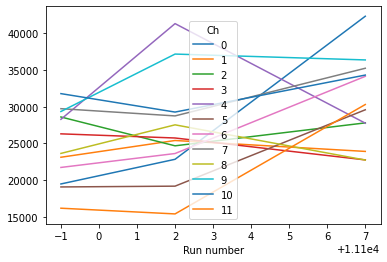

In [193]:
#plt.plot(df_ch['Run number'], df_ch['Integral'], 'bo')
df_test.plot()

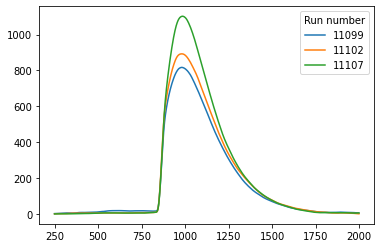

In [111]:
df_av_wf_list.groupby(['Run number']).sum().T.plot()

In [120]:
tmp = df_av_wf_list.groupby(['Run number']).sum()

In [121]:
type(tmp)

pandas.core.frame.DataFrame

In [130]:
tmp = tmp.sum(axis=1).to_frame().reset_index()
tmp

,Run number,0
0,11099,297352.774784
1,11102,320942.406503
2,11107,367199.954945


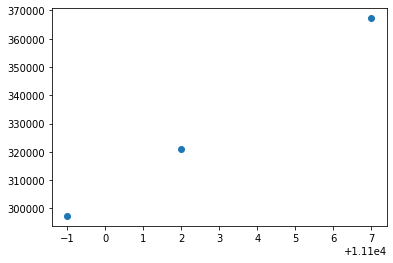

In [131]:
#plt.plot(t, t, 'r--', t, t**2, 'bs', t, t**3, 'g^')
plt.plot(tmp['Run number'], tmp[0], 'o')
plt.show()